In [49]:
import pandas as pd

In [50]:
df1 = pd.read_csv('../model/final_data.csv')
df1.head()

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.0,1.0,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.0,0.0,...,2,145,84,58,42,1678,1158,448313.054,2168,220
2,13,63,1,9,0,783,3874,4023,0.0,1.0,...,27,1173,390,246,308,5003,5784,1435958.164,2047,817
3,4,28,0,9,0,270,1589,1738,0.0,0.9,...,10,81,20,12,16,438,343,107171.103,2021,761
4,22,38,0,9,0,784,3874,4023,0.0,1.0,...,27,711,528,246,218,1129,2593,419622.336,2020,818


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356277 entries, 0 to 356276
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   city                   356277 non-null  int64  
 1   bd                     356277 non-null  int64  
 2   gender                 356277 non-null  int64  
 3   registered_via         356277 non-null  int64  
 4   is_churn               356277 non-null  int64  
 5   payment_plan_sum       356277 non-null  int64  
 6   plan_list_price        356277 non-null  int64  
 7   actual_amount_paid     356277 non-null  int64  
 8   discount_rate          356277 non-null  float64
 9   is_auto_renew          356277 non-null  float64
 10  is_cancel              356277 non-null  float64
 11  transaction_count      356277 non-null  int64  
 12  num_25                 356277 non-null  int64  
 13  num_50                 356277 non-null  int64  
 14  num_75                 356277 non-nu

In [52]:
import joblib
def load_model():
    model = joblib.load("../model/xgb_model_over.joblib")
    return model

In [53]:
def load_mode_values():
    data = pd.read_csv("../model/final_data.csv")
    mode_values = data.mode().iloc[0].to_dict()
    return mode_values

In [54]:
model_values = load_mode_values()
data = model_values.get("transaction_count", 0)
data

27.0

In [55]:
import pandas as pd
import joblib

# 모델 로드
model = joblib.load("../model/xgb_model_over.joblib")

# 이탈 가능성이 높은 데이터 생성
X_test = pd.DataFrame({
    "city": [3],  # 중간 정도의 도시 코드
    "bd": [22],  # 20대 초반 사용자
    "gender": [1],  # 남성 (0: 여성, 1: 남성)
    "registered_via": [7],  # 앱 또는 웹사이트 가입 채널
    "payment_plan_sum": [1],  # 멤버십 가입 기간이 짧음
    "plan_list_price": [9900],  # 정가
    "actual_amount_paid": [1000],  # 실제 결제 금액이 매우 낮음 (할인율 높음)
    "discount_rate": [0.9],  # 90% 할인
    "is_auto_renew": [0],  # 자동 갱신 해제
    "is_cancel": [1],  # 취소 이력이 있음
    "transaction_count": [1],  # 결제 횟수 적음
    "num_25": [10],  # 25% 이하 청취 횟수가 적음
    "num_50": [5],  # 50% 이하 청취 횟수 적음
    "num_75": [2],  # 75% 이하 청취 횟수 매우 적음
    "num_985": [1],  # 98.5% 이하 청취 횟수 거의 없음
    "num_100": [0],  # 끝까지 들은 노래 없음
    "num_unq": [5],  # 유니크한 곡 수 적음
    "total_secs": [300],  # 총 청취 시간이 매우 짧음 (5분)
    "registration_duration": [30],  # 가입한 지 1개월
    "listening_duration": [3]  # 청취한 날이 거의 없음
})

# 모델 예측
y_pred = model.predict(X_test)

# 예측 결과 확인
print(f"예측 결과 (is_churn): {y_pred[0]}")  # 1이면 이탈 예측


예측 결과 (is_churn): 0


In [56]:
df2 = pd.read_csv('../model/is_back+churn_Data.csv')
df2.head(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356277 entries, 0 to 356276
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   city                   356277 non-null  int64  
 1   bd                     356277 non-null  int64  
 2   gender                 356277 non-null  int64  
 3   registered_via         356277 non-null  int64  
 4   is_churn               356277 non-null  int64  
 5   is_back                356277 non-null  int64  
 6   payment_plan_sum       356277 non-null  int64  
 7   plan_list_price        356277 non-null  int64  
 8   actual_amount_paid     356277 non-null  int64  
 9   discount_rate          356277 non-null  float64
 10  is_auto_renew          356277 non-null  float64
 11  is_cancel              356277 non-null  float64
 12  transaction_count      356277 non-null  int64  
 13  num_25                 356277 non-null  int64  
 14  num_50                 356277 non-nu

(   city  bd  gender  registered_via  is_churn  is_back  payment_plan_sum  \
 0     4  30       1               9         0        0               603   
 1     5  34       1               9         1        0               360   
 2    13  63       1               9         0        0               783   
 3     4  28       0               9         0        0               270   
 4    22  38       0               9         0        0               784   
 
    plan_list_price  actual_amount_paid  discount_rate  ...  transaction_count  \
 0             2980                3129            0.0  ...                 21   
 1             1072                1072            0.0  ...                  2   
 2             3874                4023            0.0  ...                 27   
 3             1589                1738            0.0  ...                 10   
 4             3874                4023            0.0  ...                 27   
 
    num_25  num_50  num_75  num_985  num_1

In [57]:
import pandas as pd

# 데이터 불러오기
df2 = pd.read_csv('../model/is_back+churn_Data.csv')

# is_back == 1 또는 is_churn == 1 인 데이터만 남김
df_filtered = df2[(df2["is_back"] == 1) | (df2["is_churn"] == 1)].copy()

# is_back == 1인 데이터에서 is_back 컬럼 제외
df_is_back = df_filtered[df_filtered["is_back"] == 1].drop(columns=["is_back",'is_churn','total_secs'])

# is_churn == 1인 데이터에서 is_churn 컬럼 제외
df_is_churn = df_filtered[df_filtered["is_churn"] == 1].drop(columns=["is_churn","is_back",'total_secs'])

# 결과 확인
print("✅ is_back == 1인 데이터")
print(df_is_back.head())


✅ is_back == 1인 데이터
     city  bd  gender  registered_via  payment_plan_sum  plan_list_price  \
251    11  24       1               3               664             3278   
286     4  27       0               3               693             3685   
507    22  50       1               9               330             1950   
585    15  25       1               9               603             2980   
831     3  25       0               9               570             3048   

     actual_amount_paid  discount_rate  is_auto_renew  is_cancel  \
251                3427            0.0       0.956522   0.130435   
286                3834            0.0       0.250000   0.041667   
507                3738            0.0       0.083333   0.000000   
585                3129            0.0       1.000000   0.095238   
831                3048            0.0       0.052632   0.000000   

     transaction_count  num_25  num_50  num_75  num_985  num_100  num_unq  \
251                 23    3823     63

In [58]:
print("\n✅ is_churn == 1인 데이터")
print(df_is_churn.head())


✅ is_churn == 1인 데이터
    city  bd  gender  registered_via  payment_plan_sum  plan_list_price  \
1      5  34       1               9               360             1072   
7     15  21       1               9               457             2209   
9      5  27       1               9               467             2520   
11     5  20       0               3               512             2417   
12    15  17       0               3               450             2235   

    actual_amount_paid  discount_rate  is_auto_renew  is_cancel  \
1                 1072            0.0       0.000000   0.000000   
7                 2209            0.0       0.461538   0.076923   
9                 2520            0.0       0.000000   0.000000   
11                2417            0.0       0.000000   0.000000   
12                2384            0.0       0.000000   0.000000   

    transaction_count  num_25  num_50  num_75  num_985  num_100  num_unq  \
1                   2     145      84      58   

In [63]:
# is_back == 1인 데이터 평균
mean_is_back = df_is_back.mean()

# is_churn == 1인 데이터 평균
mean_is_churn = df_is_churn.mean()

# 출력
print("✅ is_back == 1인 데이터 평균")
print(mean_is_back)


✅ is_back == 1인 데이터 평균
city                       10.346959
bd                         25.639527
gender                      0.537162
registered_via              5.723649
payment_plan_sum          442.140541
plan_list_price          2244.108446
actual_amount_paid       2267.773311
discount_rate               0.008202
is_auto_renew               0.231132
is_cancel                   0.025068
transaction_count          14.152027
num_25                   2206.617230
num_50                    577.581081
num_75                    346.971959
num_985                   371.726351
num_100                  7978.188514
num_unq                  8457.098311
registration_duration    1344.579730
listening_duration        553.672635
dtype: float64


In [65]:
print("\n✅ is_churn == 1인 데이터 평균")
print(mean_is_churn)


✅ is_churn == 1인 데이터 평균
city                       10.464129
bd                         27.710344
gender                      0.530541
registered_via              6.176810
payment_plan_sum          450.635560
plan_list_price          2060.133944
actual_amount_paid       2101.224445
discount_rate               0.008663
is_auto_renew               0.325090
is_cancel                   0.033157
transaction_count          10.372587
num_25                   1633.982649
num_50                    427.408058
num_75                    263.380158
num_985                   285.337324
num_100                  6796.615840
num_unq                  7013.727599
registration_duration    1501.370778
listening_duration        541.487803
dtype: float64


<Figure size 1200x600 with 0 Axes>

c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44480 (\

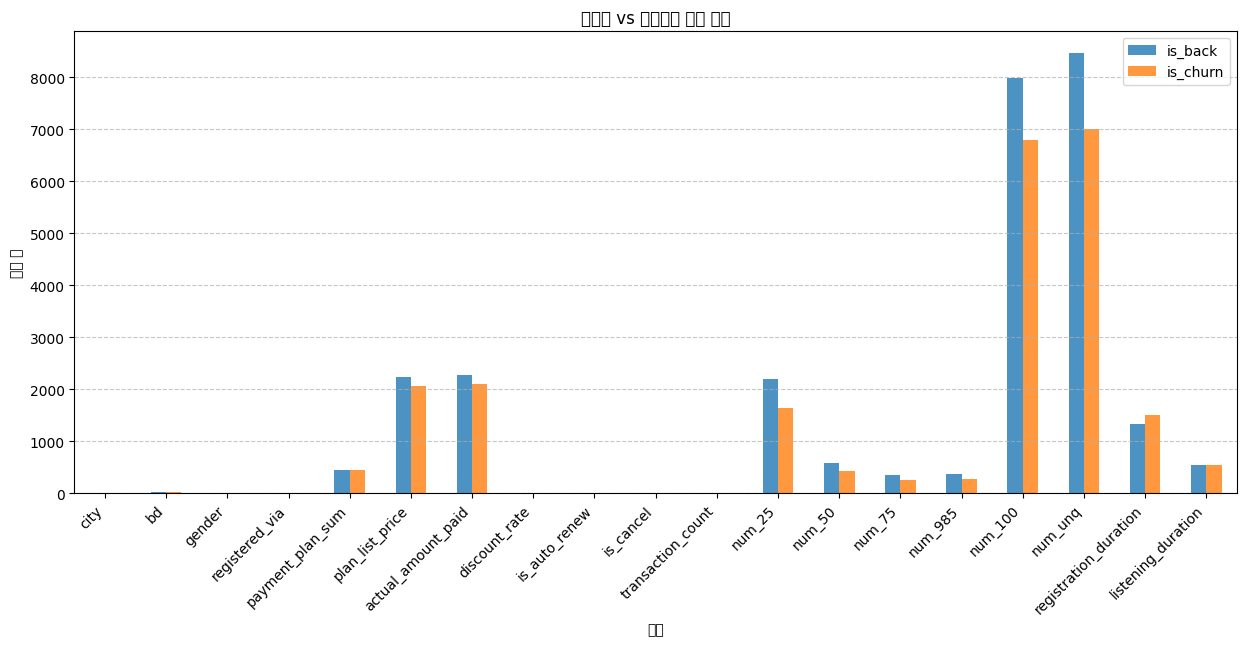

In [64]:
import matplotlib.pyplot as plt
# 데이터프레임 변환
df_means = pd.DataFrame({'is_back': mean_is_back, 'is_churn': mean_is_churn})

# 그래프 그리기
plt.figure(figsize=(12, 6))
df_means.plot(kind='bar', figsize=(15, 6), alpha=0.8)
plt.title('복귀자 vs 이탈자의 평균 비교')
plt.xlabel('특징')
plt.ylabel('평균 값')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

20
20


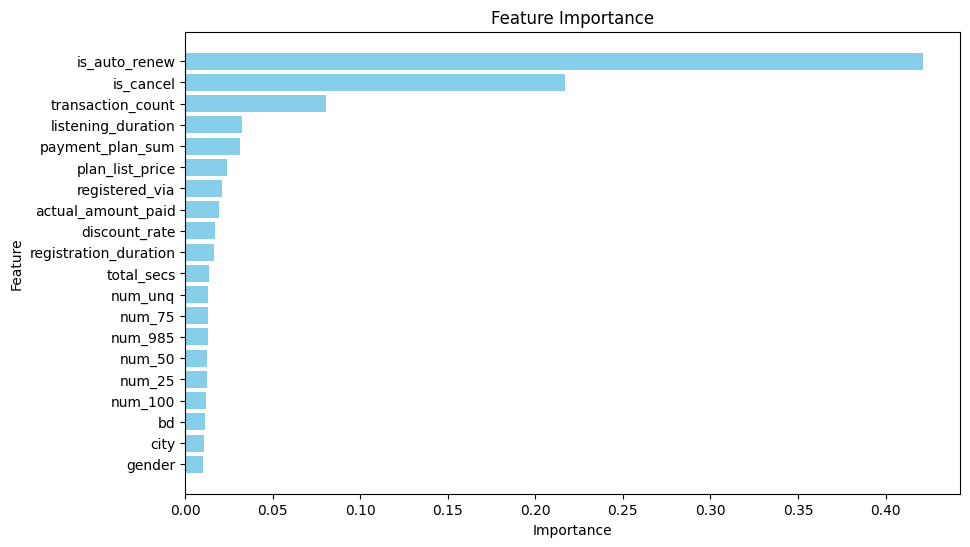

In [62]:
feature_importances = model.feature_importances_
print(len(feature_importances))

# 특성 이름 정의 (데이터셋에서 사용한 feature 이름과 동일해야 함)
feature_names = [    "city", "bd", "gender", "registered_via", "payment_plan_sum",
    "plan_list_price", "actual_amount_paid", "discount_rate",
    "is_auto_renew", "is_cancel", "transaction_count",
    "num_25", "num_50", "num_75", "num_985", "num_100",
    "num_unq", "total_secs", "registration_duration", "listening_duration"]
print(len(feature_names))
# 데이터프레임으로 변환 후 정렬
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_importance = df_importance.sort_values(by='Importance', ascending=False)


# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()

